## TITANIC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model

#### Let us load the data

In [2]:
df = pd.read_csv(r"C:\Users\Guestuser\Downloads\all\train.csv")
df.shape

(891, 12)

In [3]:
test = pd.read_csv(r"C:\Users\Guestuser\Downloads\all\test.csv")
test.shape

(418, 11)

In [4]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

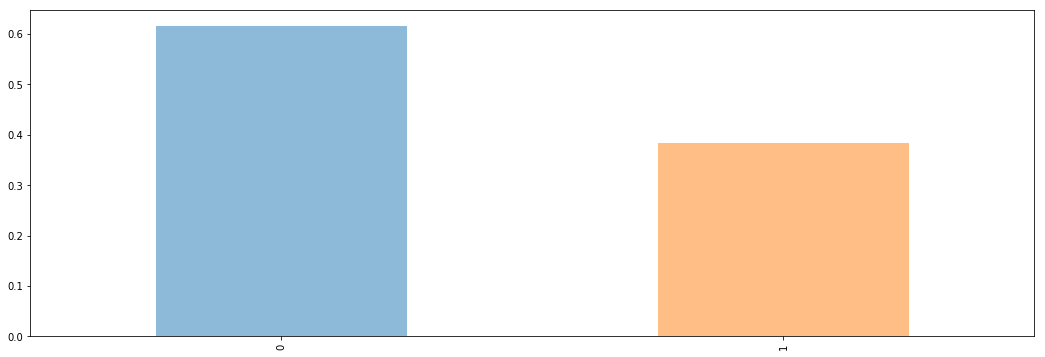

In [5]:
fig = plt.figure(figsize=(18,6))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()

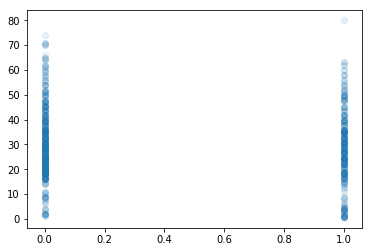

In [6]:
plt.scatter(df.Survived, df.Age, Alpha=0.1)

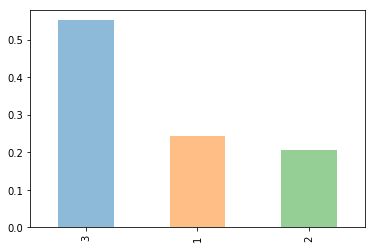

In [7]:
df.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=0.5)

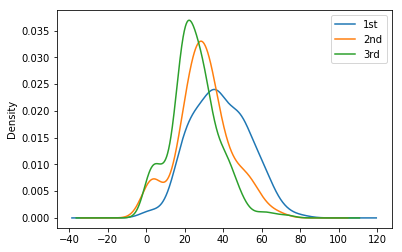

In [8]:
for x in (1,2,3):
    df.Age[df.Pclass == x].plot(kind="kde")
plt.legend(("1st","2nd","3rd"))

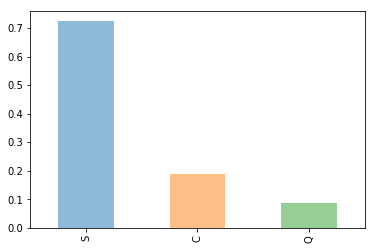

In [9]:
df.Embarked.value_counts(normalize=True).plot(kind="bar",alpha=0.5)

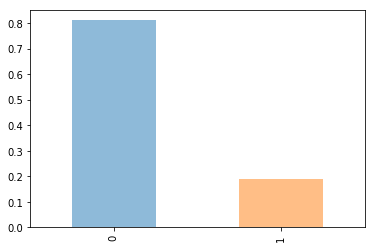

In [10]:
df.Survived[df.Sex == "male"].value_counts(normalize=True).plot(kind='bar', alpha=0.5)

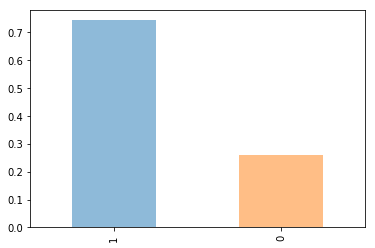

In [11]:
df.Survived[df.Sex == "female"].value_counts(normalize=True).plot(kind='bar', alpha=0.5)

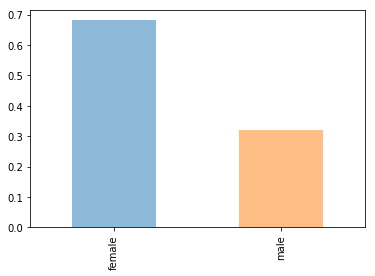

In [12]:
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind='bar', alpha=0.5)

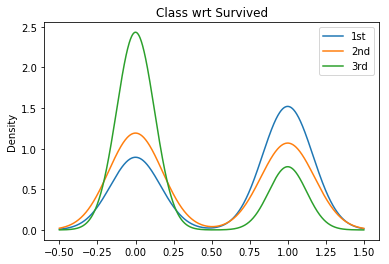

In [13]:
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("Class wrt Survived")
plt.legend(("1st","2nd","3rd"))

Text(0.5,1,'Rich Men Survived')

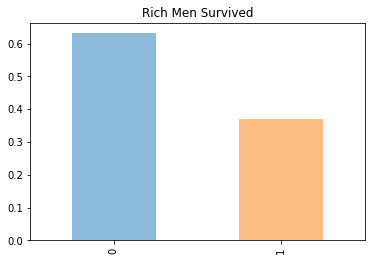

In [14]:
df.Survived[(df.Sex == "male") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Rich Men Survived")

Text(0.5,1,'Middle Men Survived')

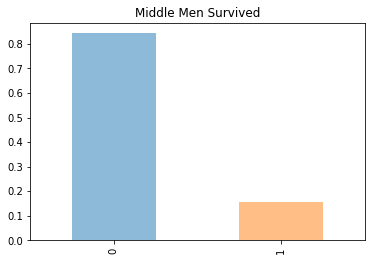

In [15]:
df.Survived[(df.Sex == "male") & (df.Pclass == 2)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Middle Men Survived")

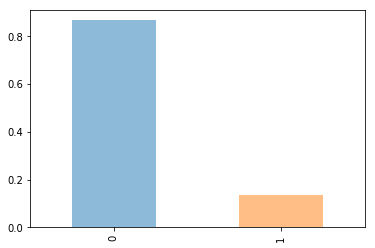

In [16]:
df.Survived[(df.Sex == "male") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)

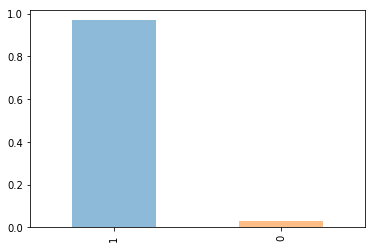

In [17]:
df.Survived[(df.Sex == "female") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)

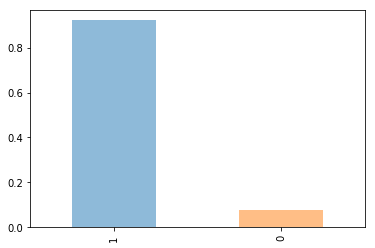

In [18]:
df.Survived[(df.Sex == "female") & (df.Pclass == 2)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)

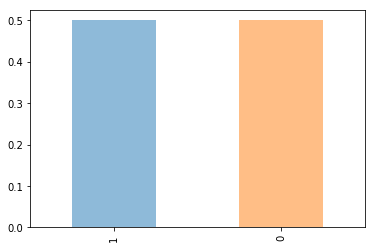

In [19]:
df.Survived[(df.Sex == "female") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)

In [20]:
df["Hyp"] = 0
df.loc[df.Sex == "female","Hyp"] = 1

df["Result"] = 0
df.loc[df.Survived == df["Hyp"], "Result"] = 1

df["Result"].value_counts(normalize=True)

1    0.786756
0    0.213244
Name: Result, dtype: float64

In [21]:
def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["age"] = data["Age"].fillna(data["Age"].dropna().median())
    
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
    
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

In [22]:
clean_data(df)

In [34]:
target = df["Survived"].values
features = df[["Pclass","Age","Sex","SibSp","Parch"]].values

classifier = linear_model.LogisticRegression()
#classifier_x = classifier.fit(features, target)

#print(classifier_x.score(feaures, target))